Written by Daksh Agrawal

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Load the data
data = pd.read_csv('../data/curated/historical_data.csv')
data

,type,suburb,Count,Date,Median,year_completed,sa2_name,sa2_code,Unnamed: 0,SA2_CODE,Population,percentage_change_rental_price,percentage_change_population
0,1 bedroom flat,Altona,87.0,2000-03-01,95.0,2000,Altona,213021341,930,213021341,12297.095890,NaN,NaN
1,1 bedroom flat,Altona,94.0,2000-06-01,100.0,2000,Altona,213021341,1452,213021341,12271.915068,0.052632,-0.002048
2,1 bedroom flat,Altona,97.0,2000-09-01,105.0,2000,Altona,213021341,1974,213021341,12246.457534,0.050000,-0.002074
3,1 bedroom flat,Altona,98.0,2000-12-01,105.0,2000,Altona,213021341,2496,213021341,12221.000000,0.000000,-0.002079
4,1 bedroom flat,Altona,89.0,2001-03-01,105.0,2001,Altona,213021341,3018,213021341,12196.095890,0.000000,-0.002038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29619,All properties,Wodonga,1233.0,2022-03-01,380.0,2022,Wodonga,204031492,46538,204031492,14863.726027,0.027027,-0.001094
29620,All properties,Wodonga,1267.0,2022-06-01,390.0,2022,Wodonga,204031492,47060,204031492,14847.271233,0.026316,-0.001107
29621,All properties,Wodonga,1251.0,2022-09-01,400.0,2022,Wodonga,204031492,47582,204031492,14830.635616,0.025641,-0.001120
29622,All properties,Wodonga,1191.0,2022-12-01,410.0,2022,Wodonga,204031492,48104,204031492,14814.000000,0.025000,-0.001122


In [53]:
# Check for missing values
data.isnull().sum()

type                                 0
suburb                               0
Count                             1883
Date                                 0
Median                            1883
year_completed                       0
sa2_name                             0
sa2_code                             0
Unnamed: 0                           0
SA2_CODE                             0
Population                           0
percentage_change_rental_price    1183
percentage_change_population       322
dtype: int64

In [54]:
# Drop the missing values
data.dropna(inplace=True)

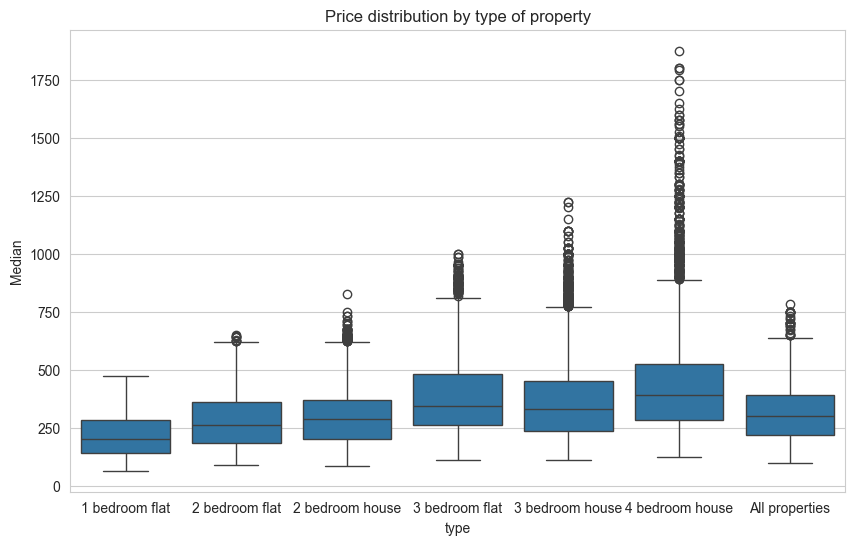

In [55]:
# Plot the price for each type of property
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='Median', data=data)
plt.title('Price distribution by type of property')
plt.show()

In [56]:
# Convert the Date column to datetime
# data['Date'] = pd.to_datetime(data['Date'])

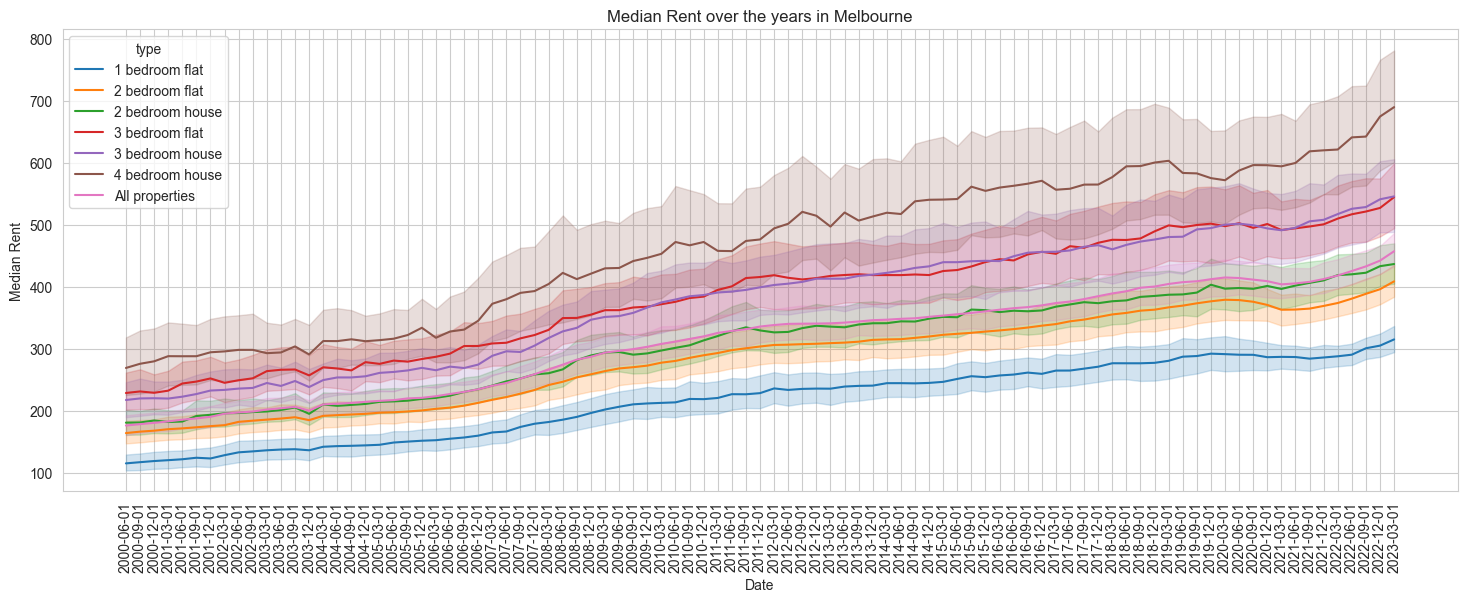

In [57]:
# Plot the price by Date
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Median', data=data, hue='type')
plt.title('Median Rent over the years in Melbourne')
plt.xlabel('Date')
plt.ylabel('Median Rent')
plt.xticks(rotation=90)
plt.show()

In [58]:
# Calculate the rent slope for each suburb over the years
slopes = []
for suburb in data['suburb'].unique():
    df = data[data['suburb'] == suburb]
    x = np.arange(len(df))
    y = df['Median']
    slope = np.polyfit(x, y, 1)[0]
    slopes.append((suburb, slope))
slopes = pd.DataFrame(slopes, columns=['suburb', 'slope'])
slopes = slopes.sort_values(by='slope', ascending=False)
slopes

,suburb,slope
40,Toorak,1.030394
11,Brighton East,0.829353
15,Docklands,0.749097
1,Armadale,0.743002
16,East Melbourne,0.692400
19,Elwood,0.652702
29,Port Melbourne,0.594683
18,Elsternwick,0.572527
20,Fitzroy,0.566986
44,Williamstown,0.552057


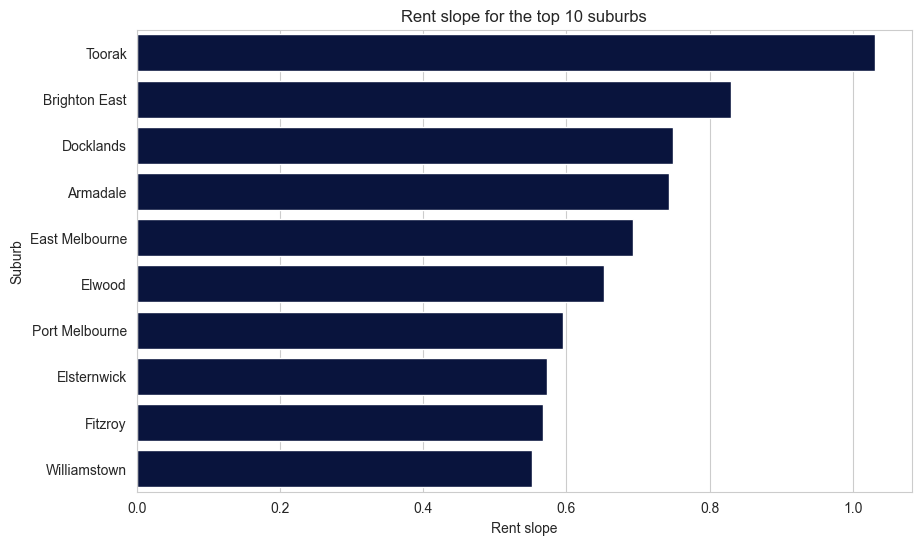

In [59]:
# Plot the rent slope for some suburbs
plt.figure(figsize=(10, 6))
sns.barplot(x='slope', y='suburb', data=slopes.head(10), color="#000F46")
plt.title('Rent slope for the top 10 suburbs')
plt.xlabel('Rent slope')
plt.ylabel('Suburb')
plt.show()

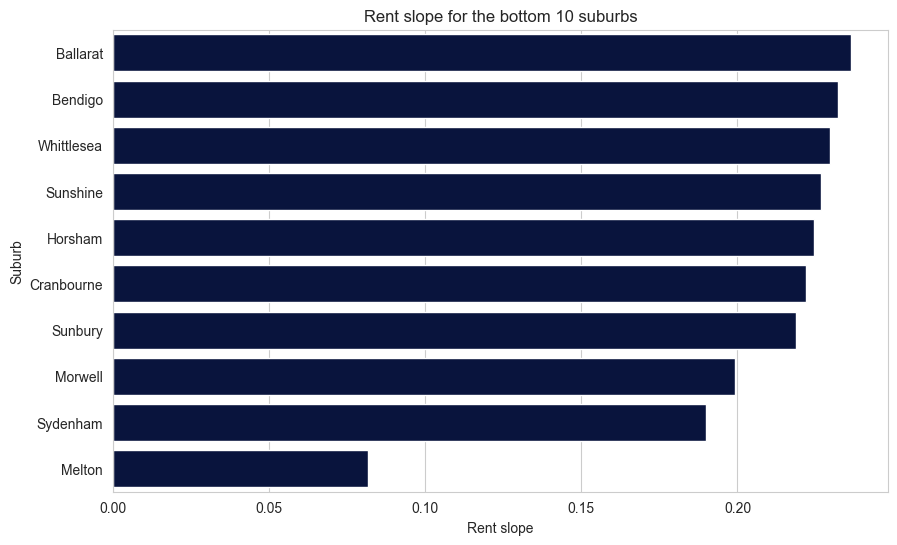

In [60]:
# Plot the rent slope for bottom 10 suburbs
plt.figure(figsize=(10, 6))
sns.barplot(x='slope', y='suburb', data=slopes.tail(10), color="#000F46")
plt.title('Rent slope for the bottom 10 suburbs')
plt.xlabel('Rent slope')
plt.ylabel('Suburb')
plt.show()

/var/folders/_7/sr3p02zn35v2xg1fm8dsbz6c0000gn/T/ipykernel_1408/444705582.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Median', data=top_10_data, hue='suburb', ci=None)
/var/folders/_7/sr3p02zn35v2xg1fm8dsbz6c0000gn/T/ipykernel_1408/444705582.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Median', data=bottom_10_data, hue='suburb', ci=None)


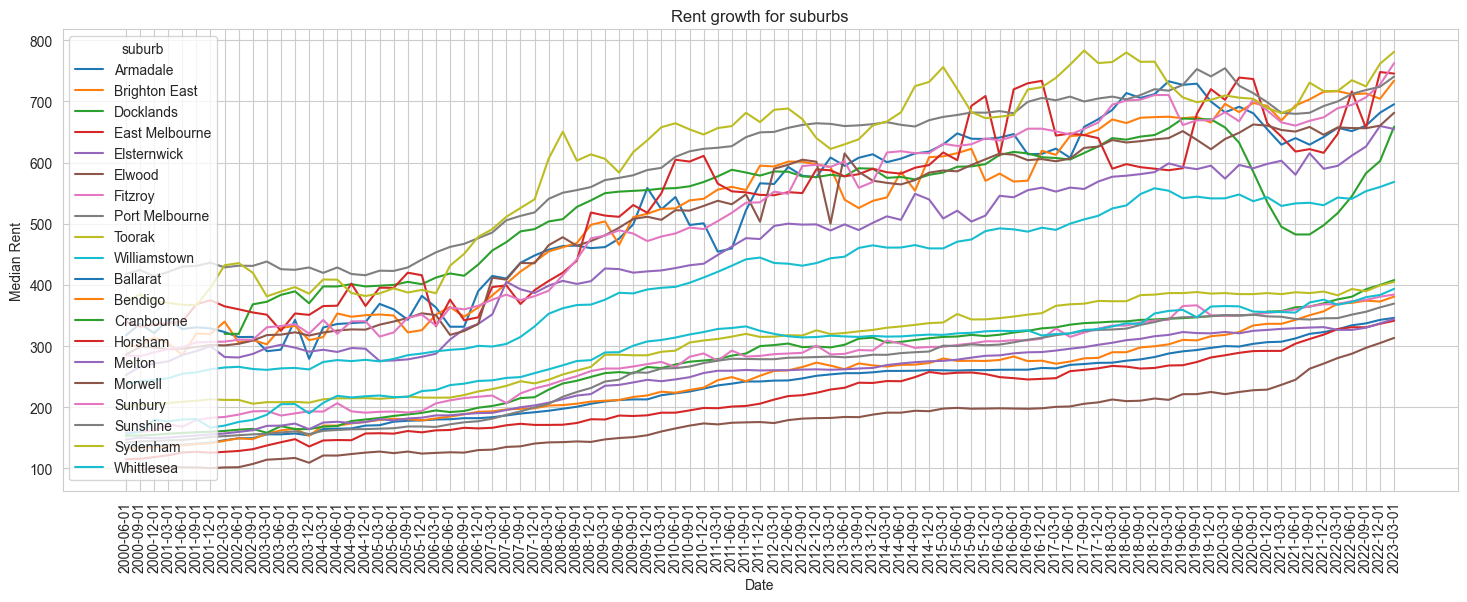

In [61]:
# Plot the rent growth for top and bottom 10 suburbs (lineplot of the median rent)
top_10 = slopes.head(10)
bottom_10 = slopes.tail(10)
top_10_data = data[data['suburb'].isin(top_10['suburb'])]
bottom_10_data = data[data['suburb'].isin(bottom_10['suburb'])]
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Median', data=top_10_data, hue='suburb', ci=None)
sns.lineplot(x='Date', y='Median', data=bottom_10_data, hue='suburb', ci=None)
plt.title('Rent growth for suburbs')
plt.xlabel('Date')
plt.ylabel('Median Rent')
plt.xticks(rotation=90)
plt.show()

In [62]:
# Finding the relative stability of rent for each suburb
stability = []
for suburb in data['suburb'].unique():
    df = data[data['suburb'] == suburb]
    stability.append((suburb, df['Median'].std()))
stability = pd.DataFrame(stability, columns=['suburb', 'stability'])
stability = stability.sort_values(by='stability', ascending=False)
stability

,suburb,stability
40,Toorak,358.215712
1,Armadale,270.726027
19,Elwood,248.518711
16,East Melbourne,223.948738
29,Port Melbourne,213.698815
11,Brighton East,212.300190
20,Fitzroy,210.703309
18,Elsternwick,205.515852
33,South Melbourne,177.371351
15,Docklands,175.604713


In [63]:
# Join the stability and slope dataframes
stability = stability.merge(slopes, on='suburb')
stability

,suburb,stability,slope
0,Toorak,358.215712,1.030394
1,Armadale,270.726027,0.743002
2,Elwood,248.518711,0.652702
3,East Melbourne,223.948738,0.692400
4,Port Melbourne,213.698815,0.594683
5,Brighton East,212.300190,0.829353
6,Fitzroy,210.703309,0.566986
7,Elsternwick,205.515852,0.572527
8,South Melbourne,177.371351,0.531862
9,Docklands,175.604713,0.749097


In [64]:
# Add SA2 code to the stability dataframe
sa2 = data[['suburb', 'sa2_code']].drop_duplicates()
stability = stability.merge(sa2, on='suburb')
stability.to_csv('../data/curated/rental_growth.csv', index=False)

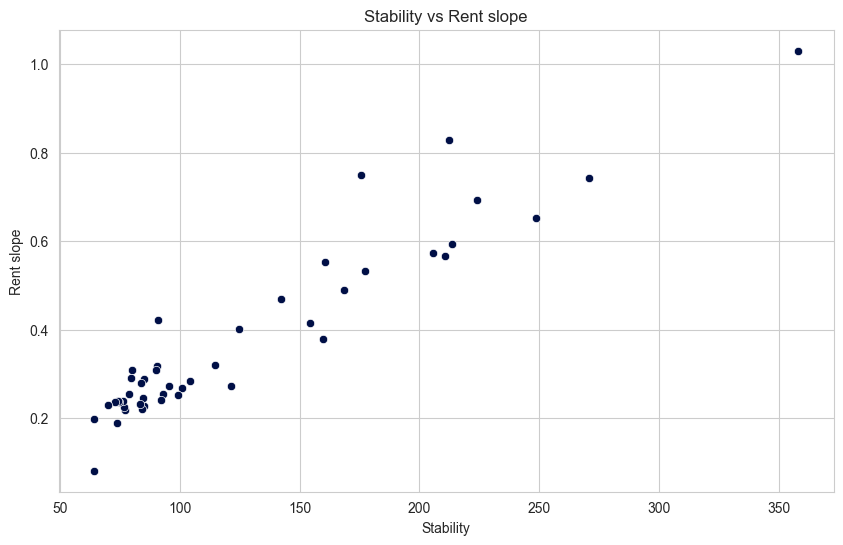

In [65]:
# Plot stability vs rent slope
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stability', y='slope', data=stability, color="#000F46")
plt.title('Stability vs Rent slope')
plt.xlabel('Stability')
plt.ylabel('Rent slope')
plt.show()

In [66]:
# Find the pearson correlation between stability and rent slope along with the p-value
from scipy.stats import pearsonr
corr, p_value = pearsonr(stability['stability'], stability['slope'])
corr, p_value

(np.float64(0.9444343755819725), np.float64(6.928301551092125e-23))

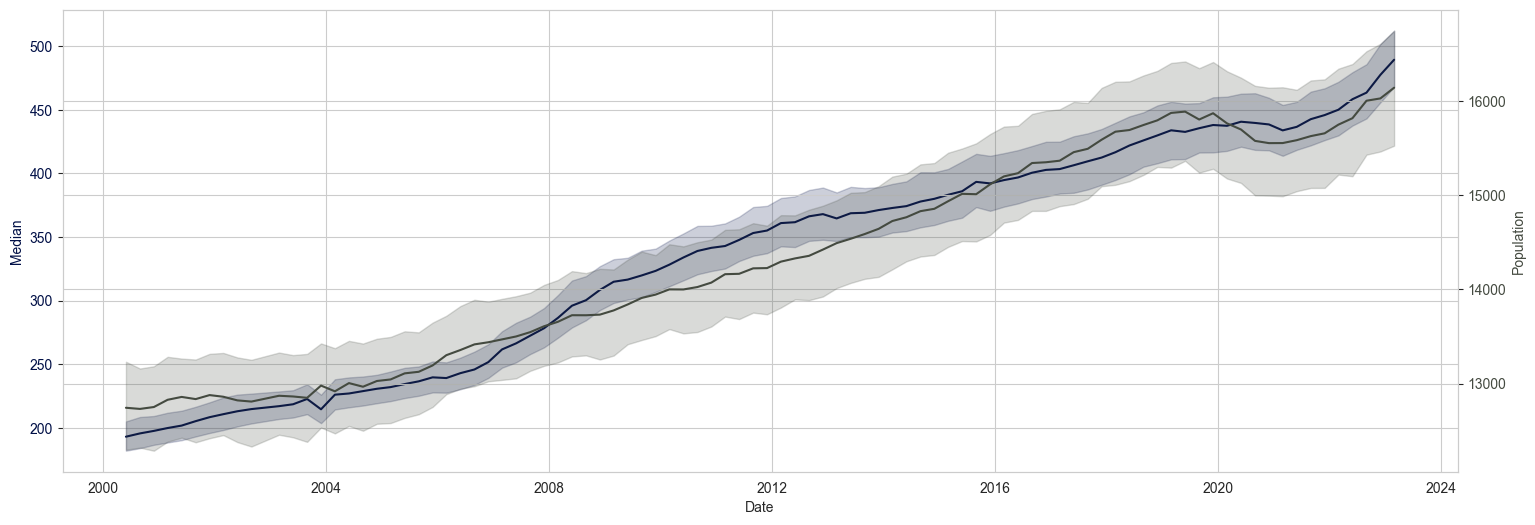

In [67]:
# Set up the figure and primary axis
fig, ax1 = plt.subplots(figsize=(18, 6))

data["Date"] = pd.to_datetime(data["Date"])

# Plot the 'Median' line on the primary y-axis
sns.lineplot(x='Date', y='Median', data=data, ax=ax1, color="#000F46")
ax1.set_ylabel('Median', color="#000F46")
ax1.tick_params(axis='y', labelcolor="#000F46")

# Create a secondary y-axis and plot the 'Population' line on it
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Population', data=data, ax=ax2, color="#444A40")
ax2.set_ylabel('Population', color="#444A40")
ax2.tick_params(axis='y', labelcolor="#444A40")

plt.show()

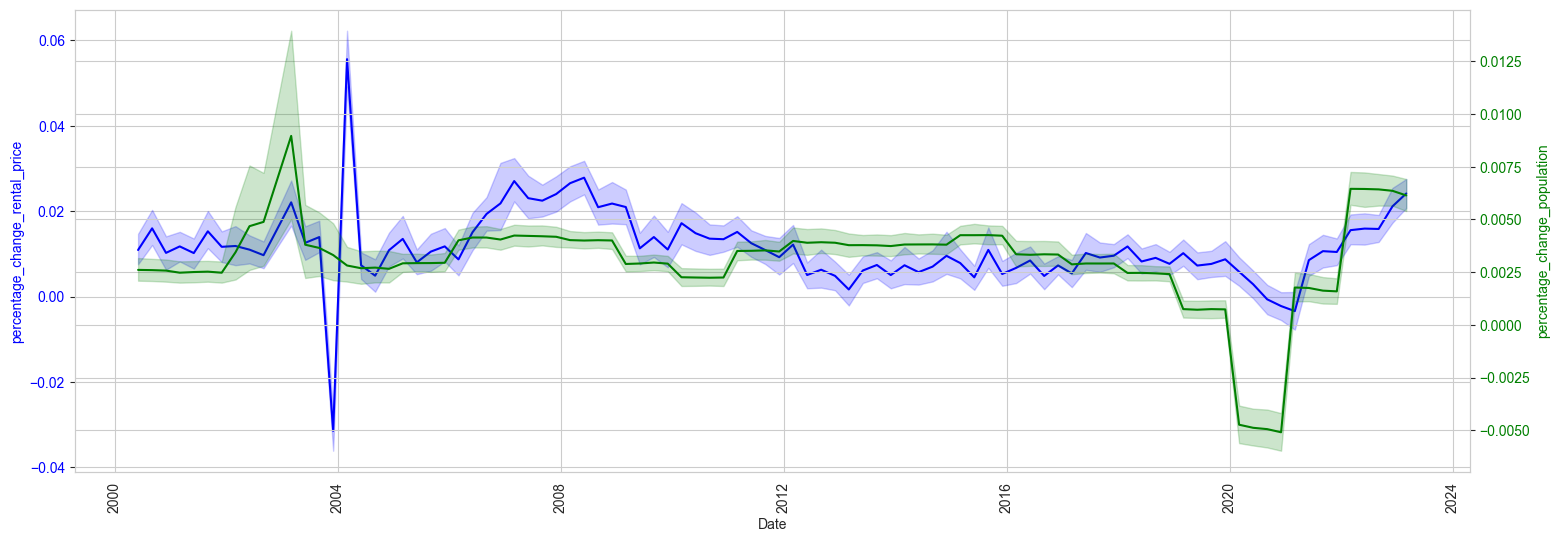

In [68]:
# Set up the figure and primary axis
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the 'Median' line on the primary y-axis
sns.lineplot(x='Date', y='percentage_change_rental_price', data=data, ax=ax1, color="blue")
ax1.set_ylabel('percentage_change_rental_price', color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Create a secondary y-axis and plot the 'Population' line on it
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='percentage_change_population', data=data, ax=ax2, color="green")
ax2.set_ylabel('percentage_change_population', color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Rotate x-axis labels
ax1.tick_params(axis='x', rotation=90)

plt.show()

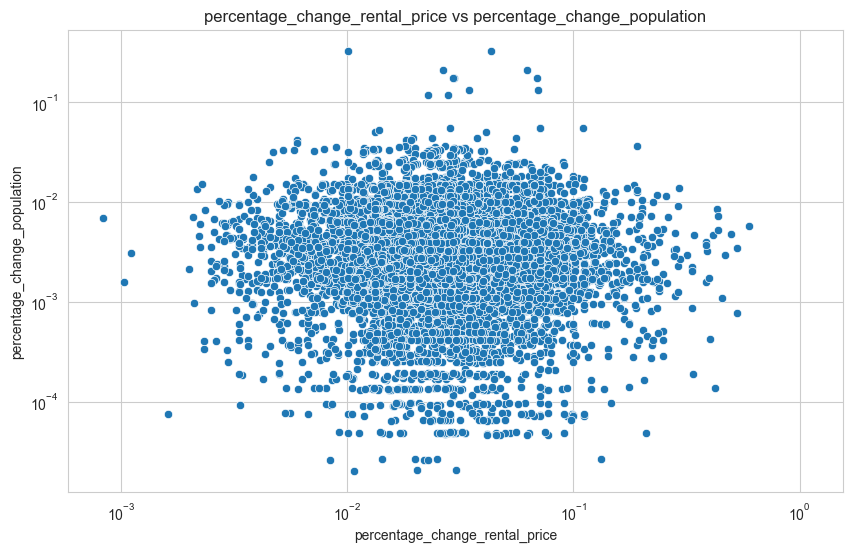

In [69]:
# Scatter plot of percentage_change_rental_price vs percentage_change_population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='percentage_change_rental_price', y='percentage_change_population', data=data)
plt.title('percentage_change_rental_price vs percentage_change_population')
plt.xlabel('percentage_change_rental_price')
plt.ylabel('percentage_change_population')
plt.yscale('log')
plt.xscale('log')
plt.show()

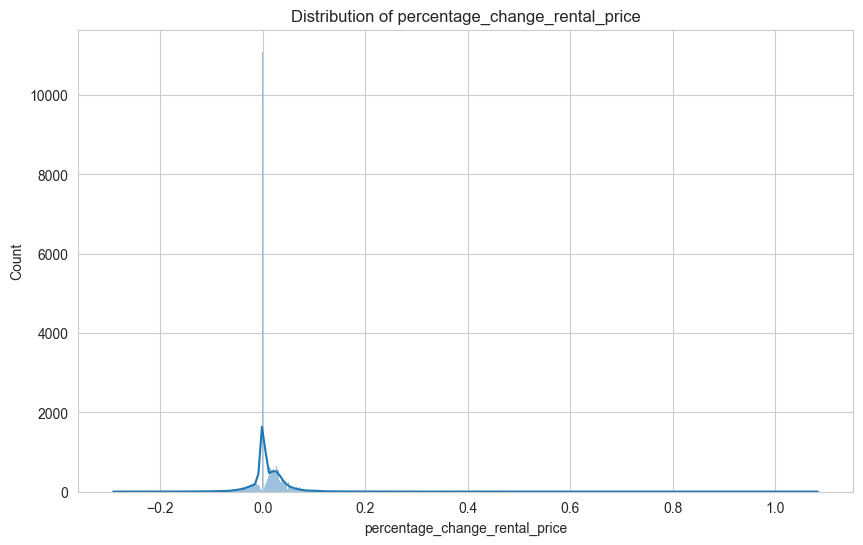

In [70]:
# Plot the distribution of percentage_change_rental_price
plt.figure(figsize=(10, 6))
sns.histplot(data['percentage_change_rental_price'], kde=True)
plt.title('Distribution of percentage_change_rental_price')
plt.xlabel('percentage_change_rental_price')
plt.show()